# About the data (Description of attributes)

***This dataset contains 119390 observations for a City Hotel and a Resort Hotel. Each observation represents a hotel booking between the 1st of July 2015 and 31st of August 2017, including booking that effectively arrived and booking that were canceled.***

**Contents:**

Since this is hotel real data, all data elements pertaining hotel or costumer identification were deleted.
Four Columns, **'name'**, **'email'**, **'phone number'** and **'credit_card'** have been artificially created and added to the dataset.

**Column Summary:**

- **Hotel:** The datasets contains the booking information of two hotel. One of the hotels is a resort hotel and the other is a city hotel.

- **is_canceled:** Value indicating if the booking was canceled (1) or not (0).

- **lead_time:** Number of days that elapsed between the entering date of the booking into the PMS and the arrival date.

- **arrival_date_year:** Year of arrival date

- **arrival_date_month:** Month of arrival date with 12 categories: “January” to “December”

- **arrival_date_week_number:** Week number of the arrival date

- **arrival_date_day_of_month:** Day of the month of the arrival date

- **stays_in_weekend_nights:** Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

- **stays_in_week_nights:** Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel BO and BL/Calculated by counting the number of week nights

- **adults:** Number of adults

# Problem statement

In the year 2015 to 2017, City Hotel and Resort Hotel have seen high cancellation rates. Each
hotel is dealing with a number of issues as a result, including fewer revenues and
less than ideal hotel room use. Consequently, lowering cancellation rates is both hotels'
primary goal in order to increase their efficiency in generating revenue, and for us to
offer thorough business advice to address this problem.

The analysis of hotel booking cancellations as well as other factors that have no bearing
on their business and yearly revenue generation are the main topics of this report.

# Assumptions

1. No unusual occurrences between 2015 and 2017 will have a substantial impact on the data used.
2. The information is still current and can be used to analyze a hotel's possible plans inan efficient manner.
3. There are no unanticipated negatives to the hotel employing any advised technique.
4. The hotels are not currently using any of the suggested solutions.
5. The biggest factor affecting the effectiveness of earning income is booking cancellations.
6. Cancellations result in vacant rooms for the booked length of time.
7. Clients make hotel reservations the same year they make cancellations.


# Reasearch question

1. What are the variables that affect hotel reservation cancellations?
2. How can we make hotel reservations cancellations better?
3. How will hotels be assisted in making pricing and promotional decisions?

# Hypothesis

1. More cancellations occur when prices are higher.
2. When there is a longer waiting list, customers tend to cancel more frequently.
3. The majority of clients are coming from offline travel agents to make their reservations.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
# Set the max_columns option to None to display all columns
pd.set_option('display.max_columns', None)
df = pd.read_csv(r'/kaggle/input/hotel-booking/hotel_booking.csv')

# Data Cleaning and Exploratory Data Analysis

In [3]:
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df.shape

(119390, 36)

#### Converting data type of target variable reservation_status_date to date time.

In [6]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [7]:
df.duplicated().sum()

0

There are no duplicate columns in our dataset.

#### Deleting customer personal details column

In [8]:
df.drop(columns = ['name', 'email', 'phone-number', 'credit_card'], inplace = True)

In [9]:
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


#### Listing unique values of all categorical columns

In [10]:
for col in df.describe(include = 'object').columns:
    print(col)
    print(df[col].unique())
    print("-"* 100)

hotel
['Resort Hotel' 'City Hotel']
----------------------------------------------------------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
----------------------------------------------------------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
----------------------------------------------------------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK

In [11]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

#### Dropping columns: agent, company (too many missing records)

In [12]:
df.drop(columns = ['agent', 'company'], inplace = True)

#### Dropping missing rows from the dataset

In [13]:
df.dropna(inplace = True)

In [14]:
df.shape

(118898, 30)

In [15]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [16]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


<Axes: xlabel='adr'>

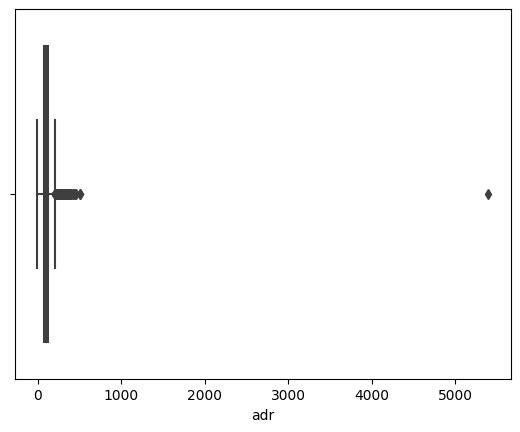

In [17]:
sns.boxplot(data = df, x = 'adr' )

Spotted extreme outlier in adr (average daily rate)

#### Removing outlier

In [18]:
df = df[df['adr'] < 5000]

In [19]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897
mean,0.371347,104.312018,2016.157657,27.166674,15.800802,0.928905,2.502157,1.858390,0.104208,0.007948,0.032011,0.087143,0.131635,0.221175,2.330774,101.958683,0.061885,0.571688,2016-07-30 07:39:51.289939968
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483167,106.903570,0.707462,13.589966,8.780321,0.996217,1.900171,0.578578,0.399174,0.097381,0.176030,0.845872,1.484678,0.652784,17.630525,48.091199,0.244173,0.792680,NaN


# Data Analysis and Visualizations

<Axes: >

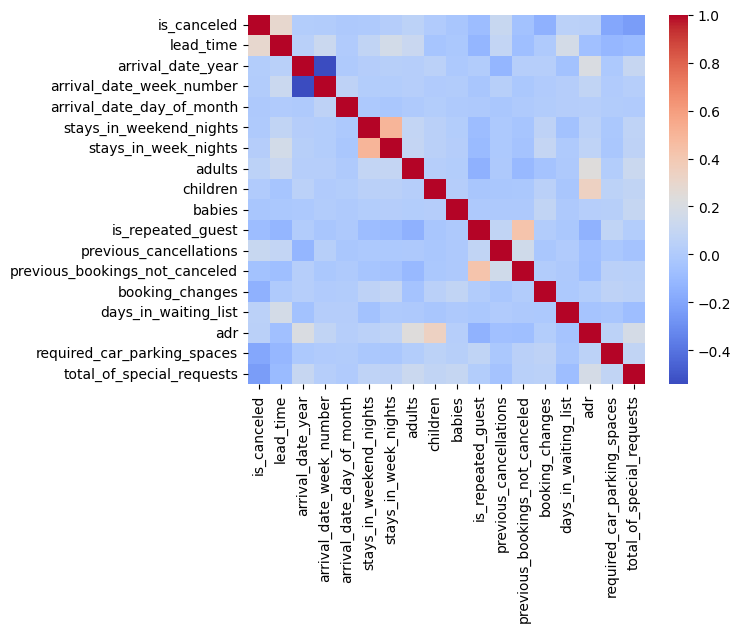

In [20]:
# Correlation between numerical column
co = df.corr(min_periods=2, numeric_only=True)
sns.heatmap(co, cmap='coolwarm')

- Cancellation shows weak positive correlation with lead_time.
- Repeated guest shows weak positive correlated to previous_booking_not_canceled.
- is_canceled has mild negative correlation with total_of_special_requests, meaning more requests lead to fewer cancellations. 
- adr shows weak positive correlation with children, meaning rates are hgih during family vacations.

### Finding booking cancellation percentage

In [21]:
cancel_per = df['is_canceled'].value_counts(normalize = True)
cancel_per

is_canceled
0    0.628653
1    0.371347
Name: proportion, dtype: float64

- Booking not cancelled = 0.628653
- Booking cancelled = 0.371347

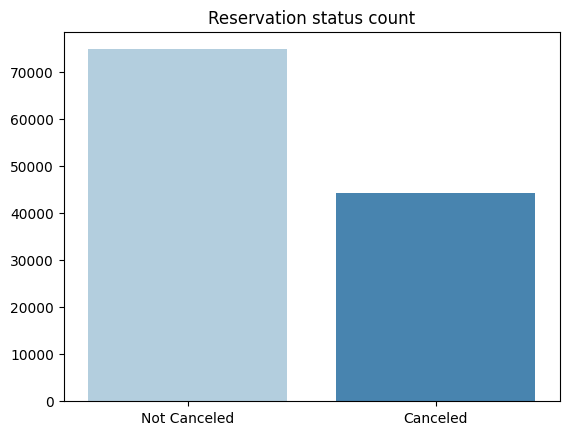

In [22]:
ax = sns.countplot(data = df, x = 'is_canceled', palette = 'Blues')
ax.set_title('Reservation status count')
ax.set_xticklabels(['Not Canceled', 'Canceled'])
ax.set_xlabel('')
ax.set_ylabel('')
plt.show()

### Finding cancellation status with respect to hotels

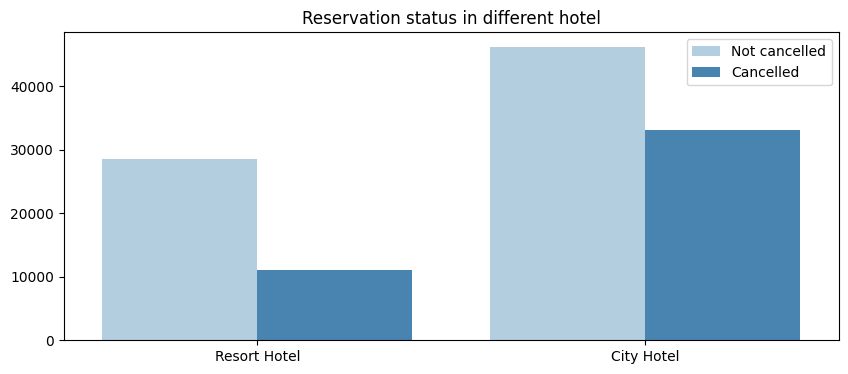

In [23]:
plt.figure(figsize = (10,4))
ax1 = sns.countplot(data = df, x = 'hotel', hue = 'is_canceled', palette = 'Blues')
ax1.set_title('Reservation status in different hotel')
plt.legend(['Not cancelled', 'Cancelled'])
ax1.set_xlabel('')
ax1.set_ylabel('')
plt.show()

In [24]:
resort = df[df['hotel'] == 'Resort Hotel']
resort['is_canceled'].value_counts(normalize = True)

is_canceled
0    0.72025
1    0.27975
Name: proportion, dtype: float64

### Resort hotel reservation status
- Not Cancelled: 0.72025
- Cancelled: 0.27975


In [25]:
city = df[df['hotel'] == 'City Hotel']
city['is_canceled'].value_counts(normalize = True)

is_canceled
0    0.582918
1    0.417082
Name: proportion, dtype: float64

### City hotel reservation status
- Not Cancelled: 0.582918
- Cancelled : 0.417082

### Visualizing Average daily rate (adr) of City and Resort hotels.

The Average Daily Rate (ADR) is a key performance indicator that represents the average room rate that a guest pays per room per day. It is calculated by dividing the total room revenue by the total number of rooms sold over a specific period.

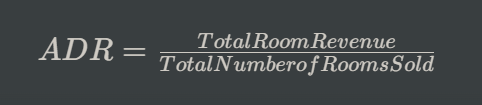

In [26]:
resort = resort.groupby('reservation_status_date')[['adr']].mean().reset_index()
city = city.groupby('reservation_status_date')[['adr']].mean().reset_index()

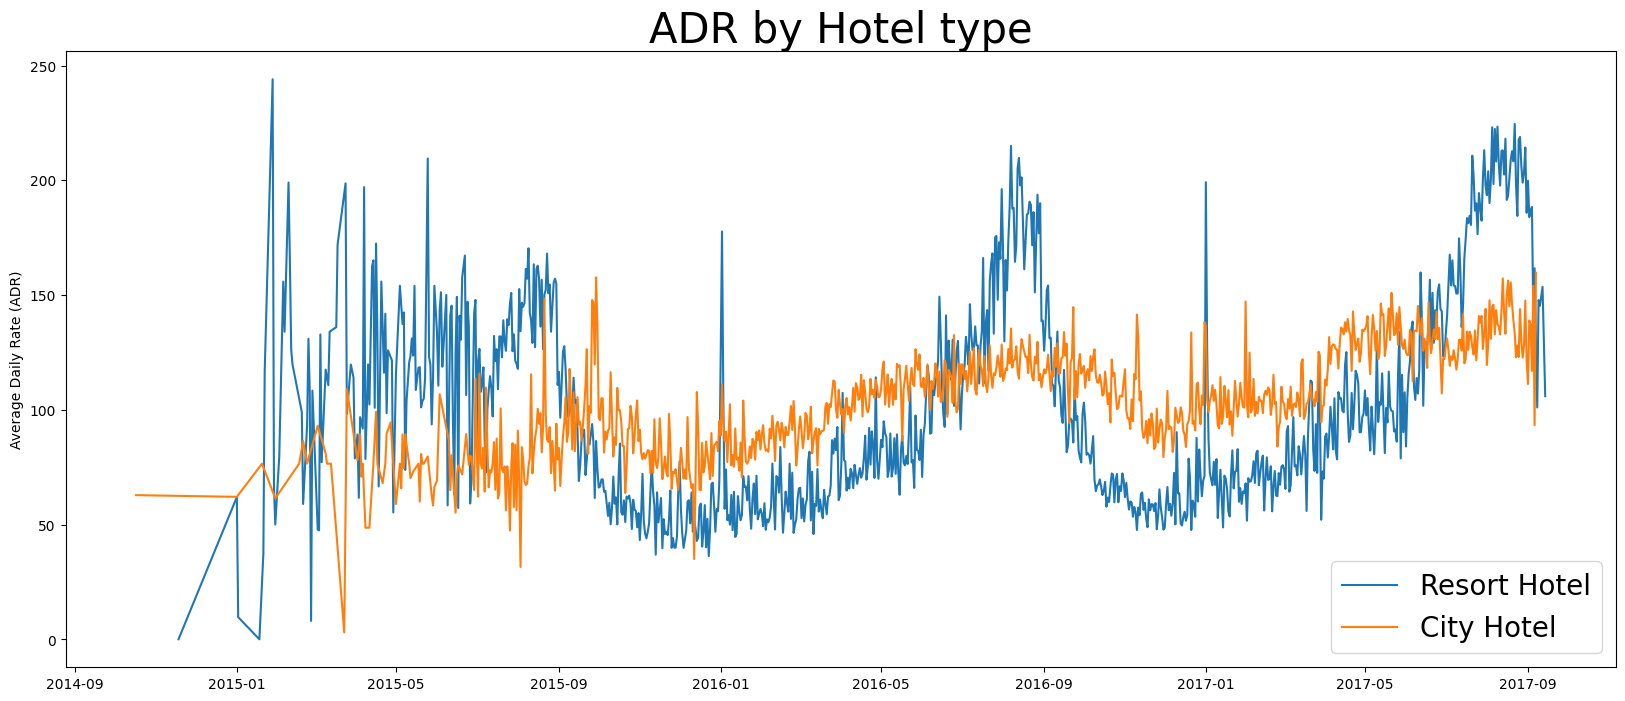

In [27]:
plt.figure(figsize = (20, 8))
sns.lineplot(data = resort, x = 'reservation_status_date', y = 'adr', label = 'Resort Hotel')
sns.lineplot(data = city, x = 'reservation_status_date', y = 'adr', label = 'City Hotel')
plt.ylabel('Average Daily Rate (ADR)')
plt.xlabel('')
plt.title('ADR by Hotel type', fontsize = 30)
plt.legend(fontsize = 20)
plt.show()

- ADR of Resort is much higher thnan City Hotels in some periods.
- High prices might be cause for cancellations for Resorts.

In [28]:
# extracting month from reservation_status_date column 
df['month'] = df['reservation_status_date'].dt.month

### Finding reservation status with respect to months.

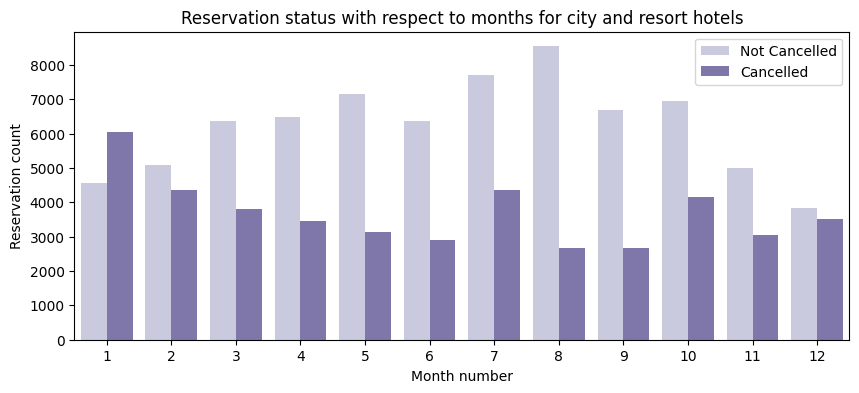

In [29]:
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = 'month', hue = 'is_canceled', palette = 'Purples')
plt.legend(['Not Cancelled', 'Cancelled'])
plt.title('Reservation status with respect to months for city and resort hotels')
plt.ylabel('Reservation count')
plt.xlabel('Month number')
plt.show()

- Highest cancellations: January
- Lowest cancellations: August
- Highest reservations: August
- Lowest reservations: December

### Reservation status w.r.t. months for City and Resort hotel

In [30]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']
city_hotel = df[df['hotel'] == 'City Hotel']

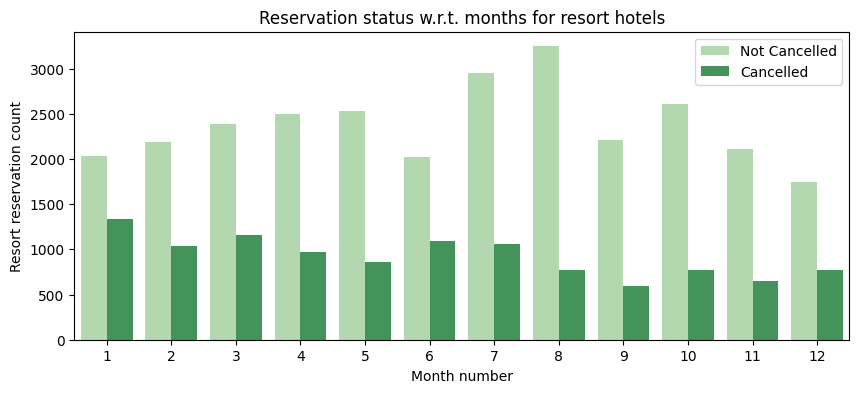

In [31]:
plt.figure(figsize = (10,4))
sns.countplot(data = resort_hotel, x = 'month', hue = 'is_canceled', palette = 'Greens')
plt.legend(['Not Cancelled', 'Cancelled'])
plt.title('Reservation status w.r.t. months for resort hotels')
plt.ylabel('Resort reservation count')
plt.xlabel('Month number')
plt.show()

### Resort hotel reservation status w.r.t. months
- Highest cancellations: January
- Lowest cancellations: September
- Highest reservations: August
- Lowest reservations: December

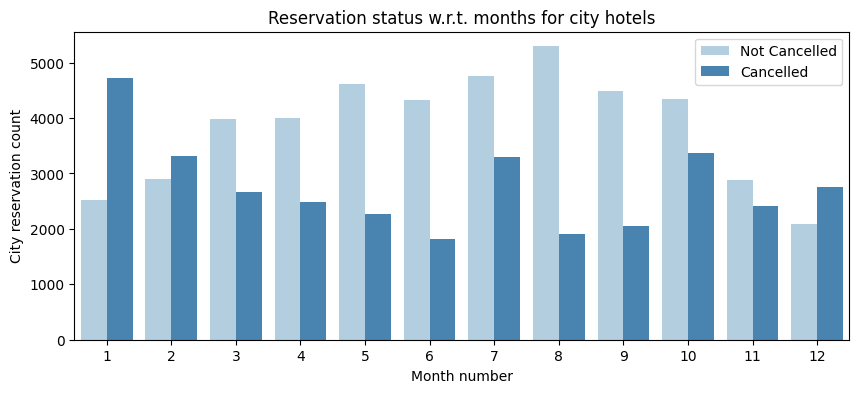

In [32]:
plt.figure(figsize = (10,4))
sns.countplot(data = city_hotel, x = 'month', hue = 'is_canceled', palette = 'Blues')
plt.legend(['Not Cancelled', 'Cancelled'])
plt.title('Reservation status w.r.t. months for city hotels')
plt.ylabel('City reservation count')
plt.xlabel('Month number')
plt.show()

### City hotel reservation status w.r.t. months
- Highest cancellations: January
- Lowest cancellations: June
- Highest reservations: August
- Lowest reservations: December

### ADR by month for cancelled reservations only

In [33]:
cancelled_city = df[(df['is_canceled'] == 1) & (df['hotel'] == 'City Hotel')].groupby('month')[['adr']].sum().reset_index()

In [34]:
cancelled_resort = df[(df['is_canceled'] == 1) & (df['hotel'] == 'Resort Hotel')].groupby('month')[['adr']].sum().reset_index()

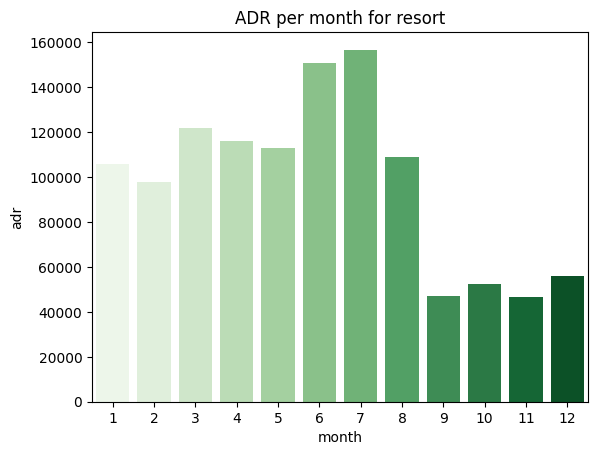

In [35]:
plt.title('ADR per month for resort')
sns.barplot(x = 'month',y = 'adr', data = cancelled_resort, palette = 'Greens')
plt.show()

### Resort hotel adr status
- Highest adr: June & July
- Lowest adr: September

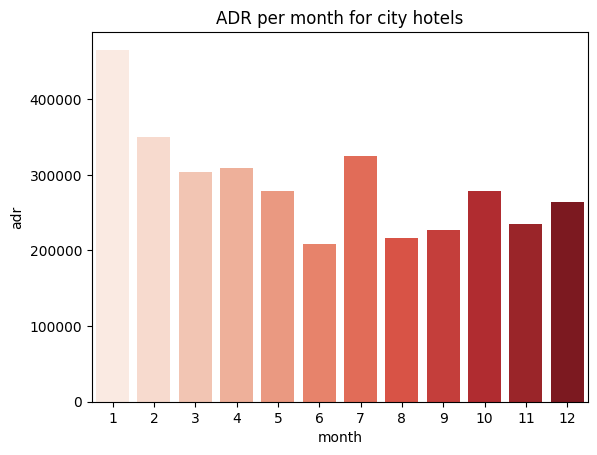

In [36]:
plt.title('ADR per month for city hotels')
sns.barplot(x = 'month',y = 'adr', data = cancelled_city, palette = 'Reds')
plt.show()

### City hotel adr status
- Highest adr: January
- Lowest adr: June & August

### Conclusion

- For city hotels, high adr leads to higher cancellations.
- For resort hotels, cancellations is not related to adr.

In [37]:
cancelled_df_adr = df[df['is_canceled'] == 1].groupby('reservation_status_date')[['adr']].mean().reset_index()
not_cancelled_df_adr = df[df['is_canceled'] == 0].groupby('reservation_status_date')[['adr']].mean().reset_index()

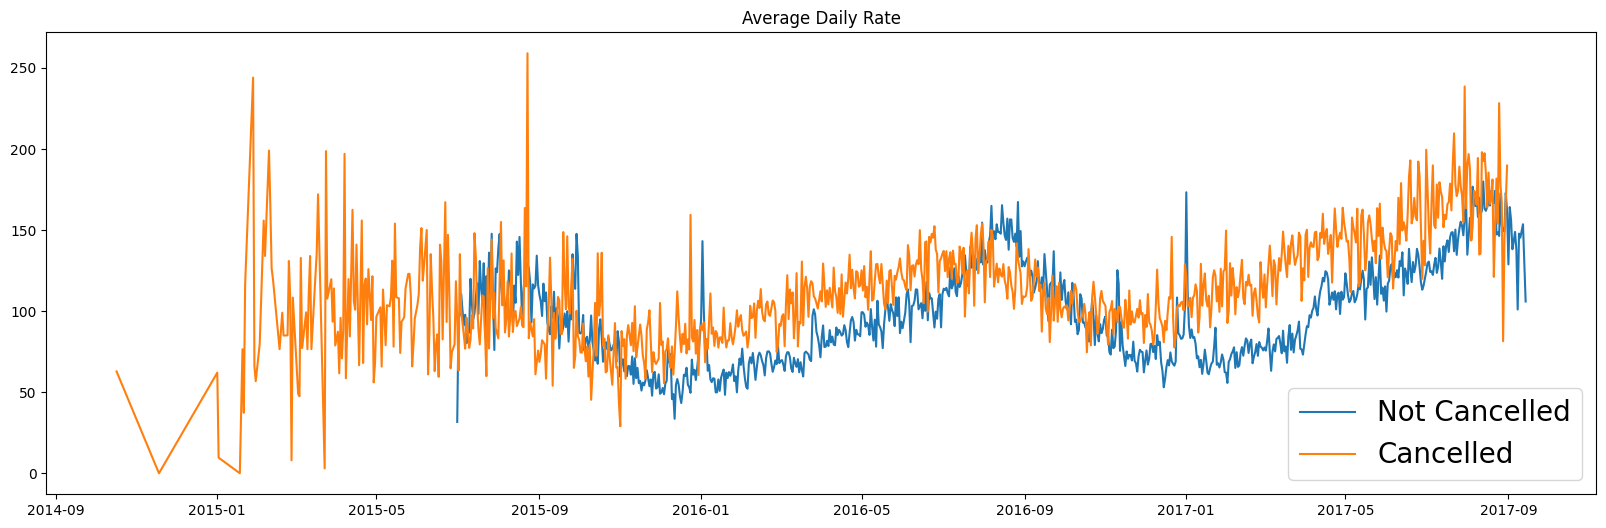

In [38]:
plt.figure(figsize = (20, 6))
plt.title('Average Daily Rate')
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'], label = 'Not Cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'], label = 'Cancelled')
plt.legend(fontsize = 20)
plt.show()

In [39]:
# filtering data from 2016 
cancelled_df_adr = df[(df['is_canceled'] == 1) & (df['reservation_status_date'] > '2016')].groupby('reservation_status_date')[['adr']].mean().reset_index()
not_cancelled_df_adr = df[(df['is_canceled'] == 0) & (df['reservation_status_date'] > '2016')].groupby('reservation_status_date')[['adr']].mean().reset_index()

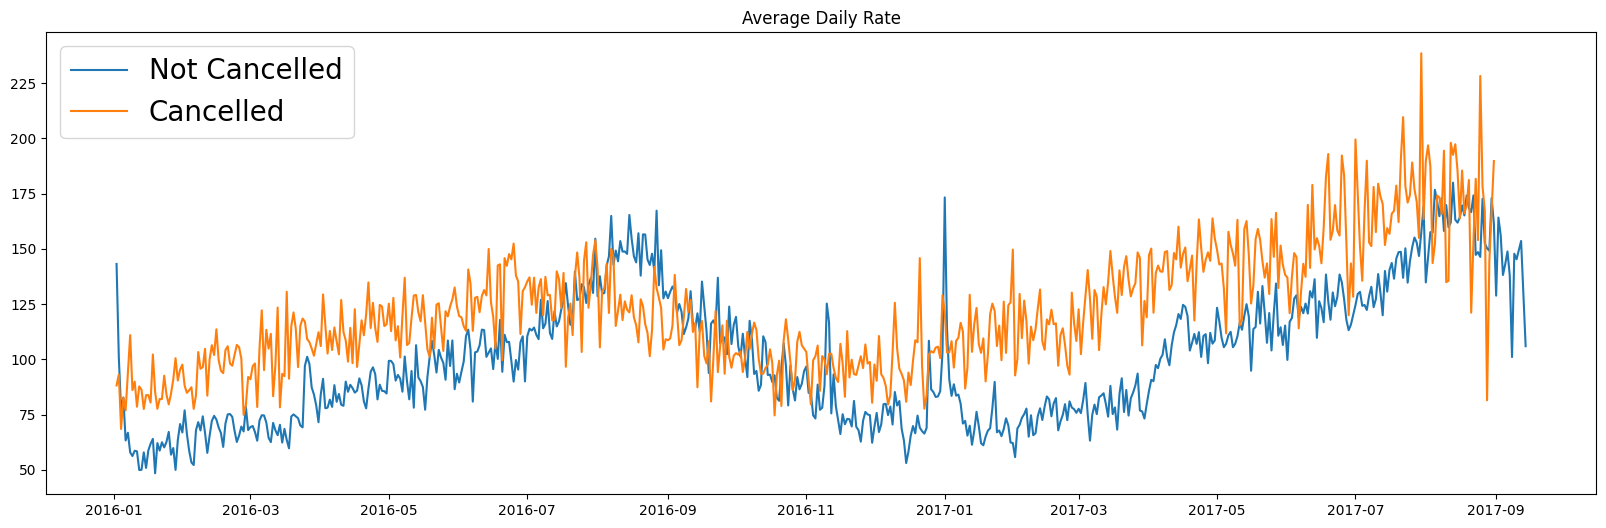

In [40]:
plt.figure(figsize = (20, 6))
plt.title('Average Daily Rate')
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'], label = 'Not Cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'], label = 'Cancelled')
plt.legend(fontsize = 20)
plt.show()

### Conclusion
Overall high cancellations when prices are high.

### Finding cancellation reason for resorts

In [41]:
# Is higher cencellations related to lead_time in resorts
resort = df[df['hotel'] == 'Resort Hotel']
resort.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,7
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,7


In [42]:
resort_canceled = resort[(resort['is_canceled'] == 1) & (resort['reservation_status_date'] > '2016')]
resort_not_canceled = resort[(resort['is_canceled'] == 0) & (resort['reservation_status_date'] > '2016')]

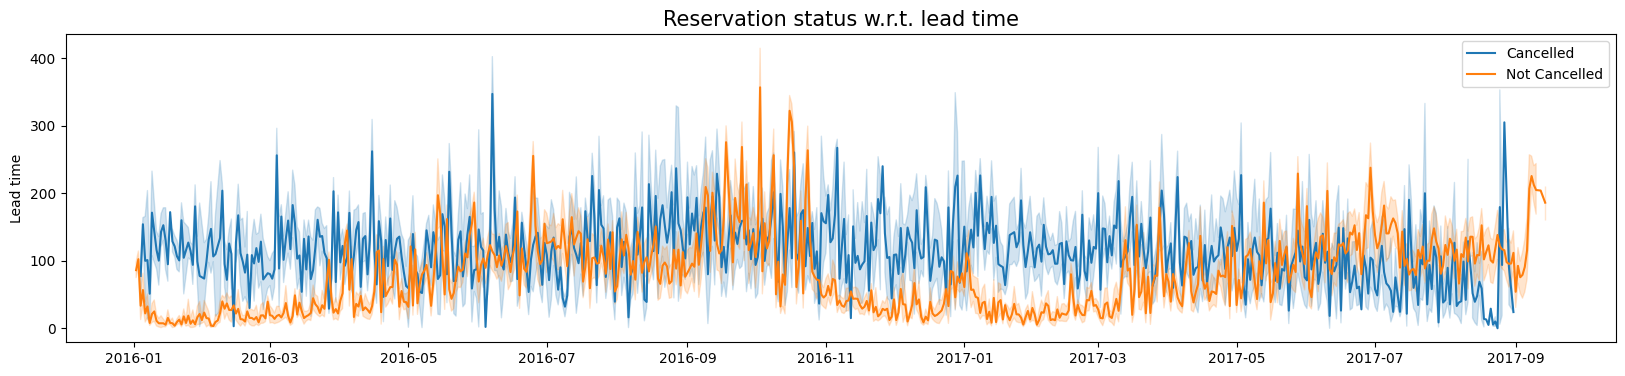

In [43]:
plt.figure(figsize=(20, 4))
ax2 = sns.lineplot(data=resort_canceled, x='reservation_status_date', y='lead_time', label='Cancelled')
sns.lineplot(data=resort_not_canceled, x='reservation_status_date', y='lead_time', label='Not Cancelled', ax=ax2)
plt.title('Reservation status w.r.t. lead time', fontsize = 15)
plt.xlabel('')
plt.ylabel('Lead time')
plt.legend(fontsize=10)
plt.show()

### Finding
Longer lead time are leading to more cancellations in resort hotels

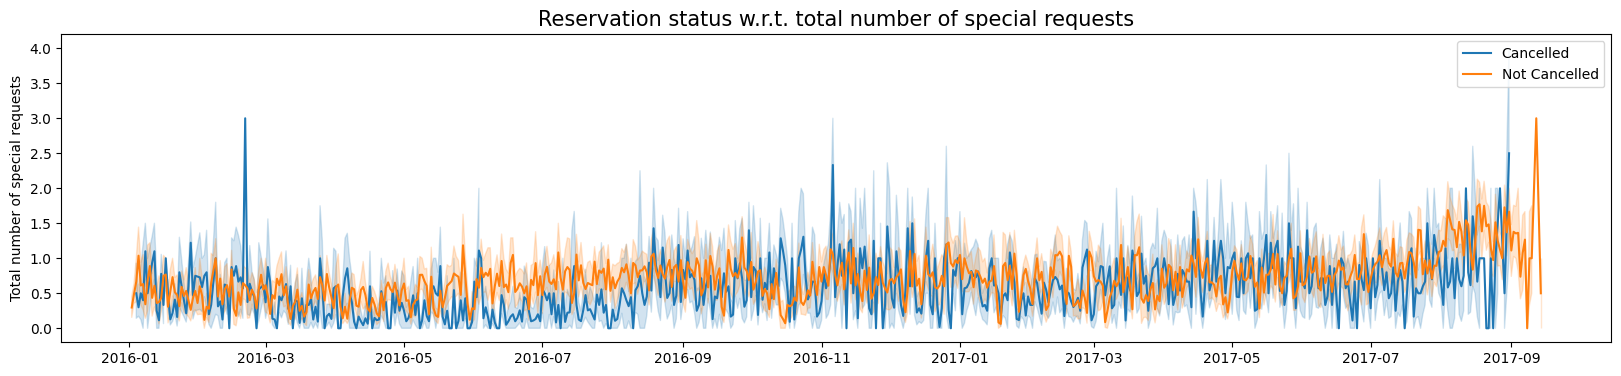

In [44]:
plt.figure(figsize = (20,4))
sns.lineplot(data = resort_canceled, x = 'reservation_status_date', y = 'total_of_special_requests', label = 'Cancelled')
sns.lineplot(data = resort_not_canceled, x = 'reservation_status_date', y = 'total_of_special_requests', label = 'Not Cancelled')
plt.title('Reservation status w.r.t. total number of special requests', fontsize = 15)
plt.xlabel('')
plt.ylabel('Total number of special requests')
plt.legend(fontsize = 10)
plt.show()

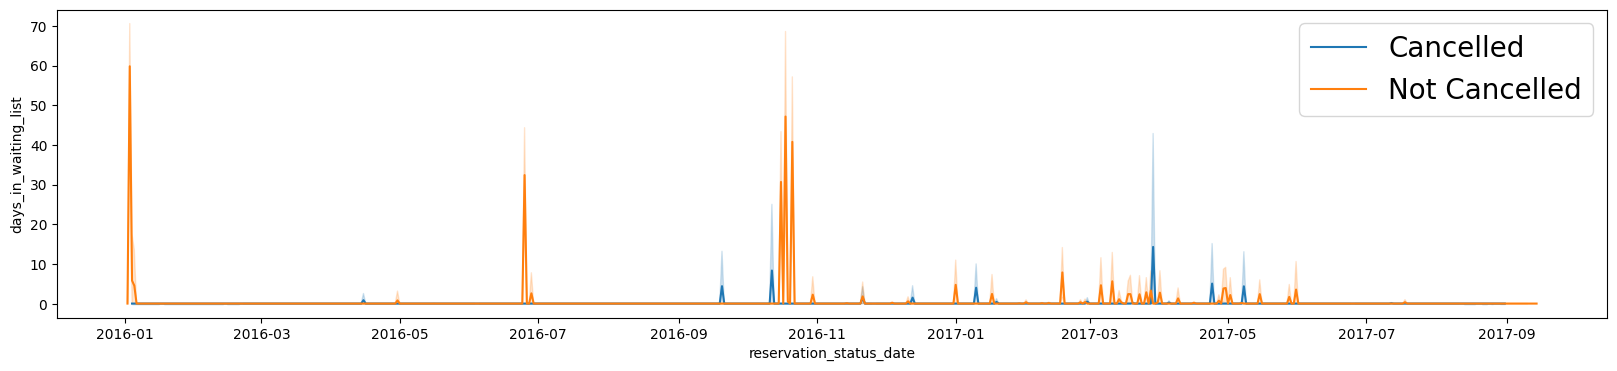

In [45]:
plt.figure(figsize = (20,4))
sns.lineplot(data = resort_canceled, x = 'reservation_status_date', y = 'days_in_waiting_list', label = 'Cancelled')
sns.lineplot(data = resort_not_canceled, x = 'reservation_status_date', y = 'days_in_waiting_list', label = 'Not Cancelled')
plt.title('')
plt.legend(fontsize = 20)
plt.show()

## `Analyzing cancellations by country`

In [46]:
top_10_countr = df.groupby('country')[['is_canceled']].sum().sort_values(by = 'is_canceled', ascending = False).reset_index().head(10)
top_10_countr

,country,is_canceled
0,PRT,27514
1,GBR,2453
2,ESP,2177
3,FRA,1934
4,ITA,1333
5,DEU,1218
6,IRL,832
7,BRA,830
8,USA,501
9,BEL,474


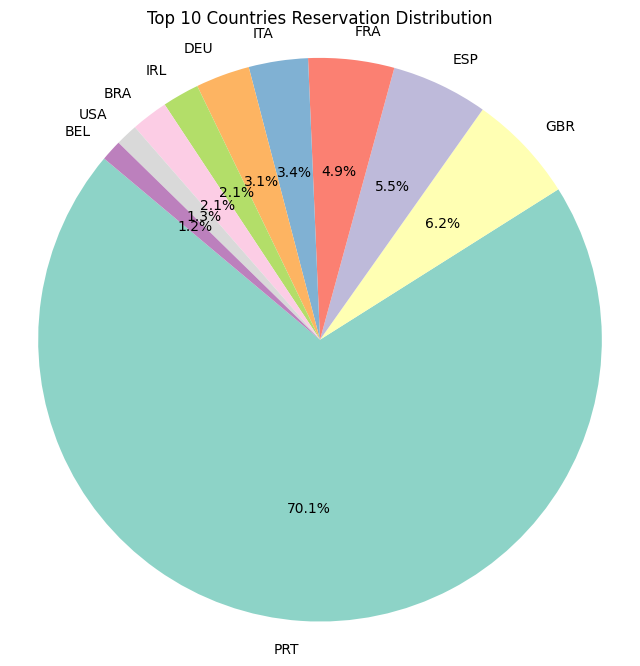

In [47]:
labels = top_10_countr['country']
sizes = top_10_countr['is_canceled']
colors = sns.color_palette("Set3")
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors = colors)
plt.axis('equal')
plt.title('Top 10 Countries Reservation Distribution')
plt.show()

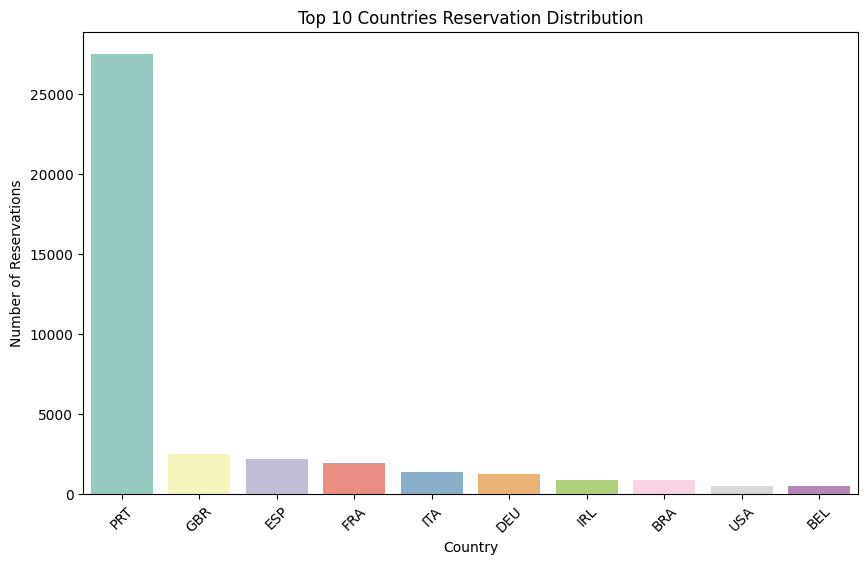

In [48]:
plt.figure(figsize=(10, 6))
sns.barplot(x="country", y="is_canceled", data=top_10_countr, palette="Set3")
plt.title('Top 10 Countries Reservation Distribution')
plt.xlabel('Country')
plt.ylabel('Number of Reservations')
plt.xticks(rotation=45)
plt.show()


In [49]:
# Distribution of market segments
df['market_segment'].value_counts()

market_segment
Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: count, dtype: int64

In [50]:
df['market_segment'].value_counts(normalize = True)

market_segment
Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: proportion, dtype: float64

### Finding
- 47% booking from online medium

### Suggestion
- Provide accurate photos of hotel to reduce cancellations.
- Utilize a reliable online booking platform that allows guests to make reservations easily. Provide high-quality photos and detailed descriptions of properties.
- Stay competitive with your pricing while maintaining the quality of the services. Offer promotions, discounts, and loyalty programs to attract repeat customers.
- Encourage satisfied guests to leave positive reviews on platforms like TripAdvisor, Yelp, or Google Reviews. Respond to reviews, whether positive or negative, to show the commitment to customer satisfaction.
- Use social media platforms to promote your hotel and engage with potential guests. Share high-quality images, updates, and special offers.


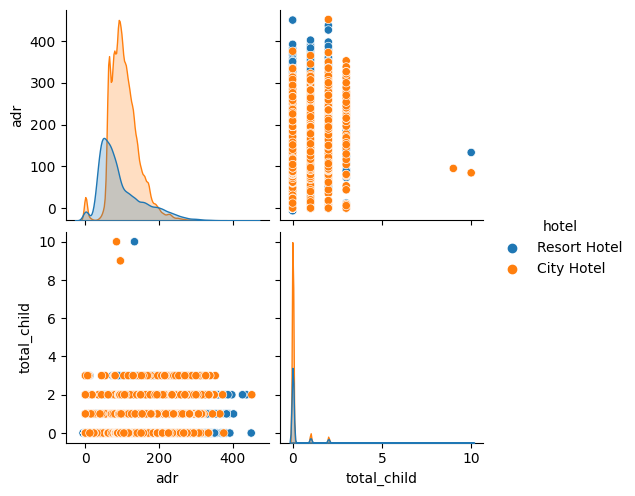

In [51]:
df['total_child'] = df['children'] + df['babies']
sns.pairplot(data = df[df['adr']<500][['hotel','adr', 'total_child']], hue='hotel')
plt.show()

### Hotel type preference
- Families with kids prefer city hotels over resorts.
- Tourists without kids prefer resorts. This may include group of friends, couples, solo travellers.

### Suggestion
- Recognizing that City Hotel is the top choice for families traveling with their little ones is truly heartwarming. This valuable insight inspires us to go the extra mile in celebrating and enriching the family-friendly offerings and adventures at the City Hotel, ensuring that we create unforgettable moments for families planning their special getaways.
- To enhance the resort hotel experience for a target demographic of adult tourists without children, a strategic approach can be adopted to create a more couple-friendly and friends-friendly environment, catering to the preferences and needs of this specific market segment.

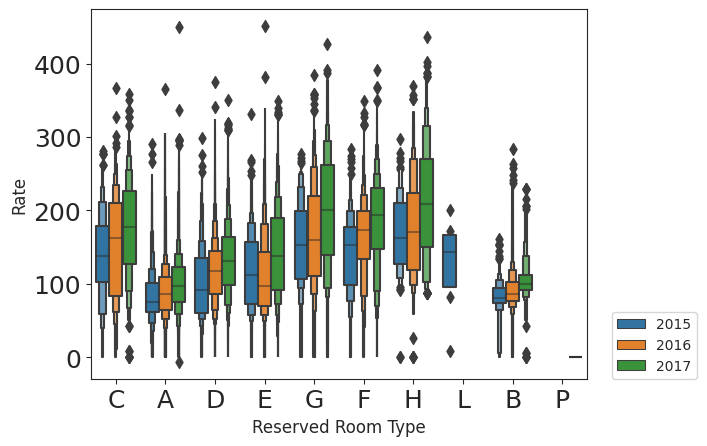

In [52]:
sns.set_style('ticks')
sns.boxenplot(data = df[df['adr']<500], x='reserved_room_type', y='adr', hue='arrival_date_year', width=0.8)
plt.xlabel('Reserved Room Type', fontsize=12)
plt.xticks(fontsize=18)
plt.ylabel('Rate', fontsize=12)
plt.yticks(fontsize=18)
plt.legend(loc=(1.05,0))
plt.show()

### Room type preferences
- C, G, H are most preferred.
- A, D, B are least preferred.

### Suggestion
- Room Upgrades: Consider offering room upgrades to guests who book less popular room types. This can be a way to upsell and generate more revenue. Make sure to highlight the benefits of the upgraded room.

# Suggestions

1. Strategic Pricing Adjustments: Cancellation rates tend to increase as room prices rise. To mitigate cancellations, hotels can optimize their pricing strategies by offering location-based discounts and special consumer incentives.

2. Weekend and Holiday Discounts: Resort hotels experience a higher cancellation-to-booking ratio compared to city hotels. To address this, hotels should consider offering competitive discounts on room rates during weekends and holidays.

3. January Revenue Boost Campaign: In the month of January, hotels can initiate revenue-boosting campaigns and marketing efforts at reasonable price points. This is especially valuable, given that January tends to have the highest cancellation rates.

4. Early Bird Benefits: Offer discounts or perks for guests who book in advance, encouraging early reservations.

5. Enhanced Quality and Service in Portugal: To reduce cancellation rates, hotels, particularly in Portugal, can focus on elevating the quality of their accommodations and services. This strategy aims to enhance guest satisfaction and loyalty, resulting in fewer cancellations.

6. Effective Cancellation Management: Recognizing the emerging trend of post-cancellation payments, viewed as an opportunity to turn challenges into advantages from a business standpoint, we can effectively leverage this situation. By employing astute strategies aimed at reducing cancellations, including transparent terms and conditions, considerate reminders, and potentially introducing incentives for guests committed to their reservations, we can create a win-win scenario. This approach not only enhances the guest experience but also guarantees a consistent revenue flow for the business.
